In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image


Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [2]:
#step 1
df = pd.read_csv(r'C:\Users\Rishi\Downloads\HW3-1\Titanic.csv')

filling all the missing values in age column with mean value of age column 

In [3]:
df['age'].fillna(df['age'].mean(), inplace = True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1309 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


splitting dataset into 80% training set and 20% testing set

In [4]:
training_set, testing_set = train_test_split(df, test_size=0.2, random_state=25)
print(training_set)
print(testing_set)

      Unnamed: 0 pclass  survived                             name     sex  \
186          187    1st         1  Lindstrom, Mrs. Carl Johan (Sig  female   
701          702    3rd         0                 Calic, Mr. Petar    male   
894          895    3rd         1  Johnson, Master. Harold Theodor    male   
1118        1119    3rd         0  Peltomaki, Mr. Nikolai Johannes    male   
965          966    3rd         0           Lievens, Mr. Rene Aime    male   
...          ...    ...       ...                              ...     ...   
886          887    3rd         1              Jermyn, Miss. Annie  female   
143          144    1st         1      Harder, Mr. George Achilles    male   
474          475    2nd         0  Kvillner, Mr. Johan Henrik Joha    male   
318          319    1st         0   Williams-Lambert, Mr. Fletcher    male   
1156        1157    3rd         0      Rosblom, Miss. Salli Helena  female   

            age  sibsp  parch             ticket     fare cabin

step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. 
Plot the full tree. Make sure ‘survived’ is a qualitative variable 

In [5]:
#step 2
replace_pclass = {'1st':int(0), '2nd':int(1), '3rd':int(2)}
replace_sex = {'female': int(0), 'male': int(1)}

training_set[['pclass']] = training_set[['pclass']].replace(replace_pclass)
training_set[['sex']] = training_set[['sex']].replace(replace_sex)

testing_set[['pclass']] = testing_set[['pclass']].replace(replace_pclass)
testing_set[['sex']] = testing_set[['sex']].replace(replace_sex)

features = ['pclass', 'sex', 'age', 'sibsp']
target = 'survived'

X2 = training_set[features]
Y2 = training_set[target]

X2_test = testing_set[features]
Y2_test = testing_set[target]

In [6]:
print(X2)

      pclass  sex        age  sibsp
186        0    0  55.000000      0
701        2    1  17.000000      0
894        2    1   4.000000      1
1118       2    1  25.000000      0
965        2    1  24.000000      0
...      ...  ...        ...    ...
886        2    0  29.881135      0
143        0    1  25.000000      1
474        1    1  31.000000      0
318        0    1  29.881135      0
1156       2    0   2.000000      1

[1047 rows x 4 columns]


In [7]:
print(Y2)

186     1
701     0
894     1
1118    0
965     0
       ..
886     1
143     1
474     0
318     0
1156    0
Name: survived, Length: 1047, dtype: int64


In [8]:
# Decision tree classifier function  and classification report and acuracy
print(X2_test, Y2_test)
dec_tree = tree.DecisionTreeClassifier()
trained  = dec_tree.fit(X2,Y2)
y_pred = dec_tree.predict(X2_test)

print("Classification Report: \n\n",classification_report(Y2_test, y_pred))

print("Accuracy: ",accuracy_score(Y2_test, y_pred))

      pclass  sex        age  sibsp
801        2    1  29.881135      0
532        1    1  41.000000      0
1105       2    1  14.000000      4
619        2    1  18.000000      0
865        2    0  29.881135      0
...      ...  ...        ...    ...
966        2    0  25.000000      0
1234       2    1  25.000000      0
370        1    0  25.000000      1
1215       2    1  29.881135      0
270        0    0  18.000000      1

[262 rows x 4 columns] 801     0
532     0
1105    0
619     0
865     0
       ..
966     0
1234    0
370     1
1215    0
270     1
Name: survived, Length: 262, dtype: int64
Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.84      0.81       160
           1       0.71      0.61      0.66       102

    accuracy                           0.75       262
   macro avg       0.74      0.73      0.73       262
weighted avg       0.75      0.75      0.75       262

Accuracy:  0.7519083969465649



(process:30956): GLib-GIO-WARNING **: 14:07:49.841: Unexpectedly, UWP app `AcerIncorporated.PredatorSenseV30_3.0.3162.0_x64__48frkmn4z8aw4' (AUMId `AcerIncorporated.PredatorSenseV30_48frkmn4z8aw4!CentenialConvert') supports 1 extensions but has no verbs



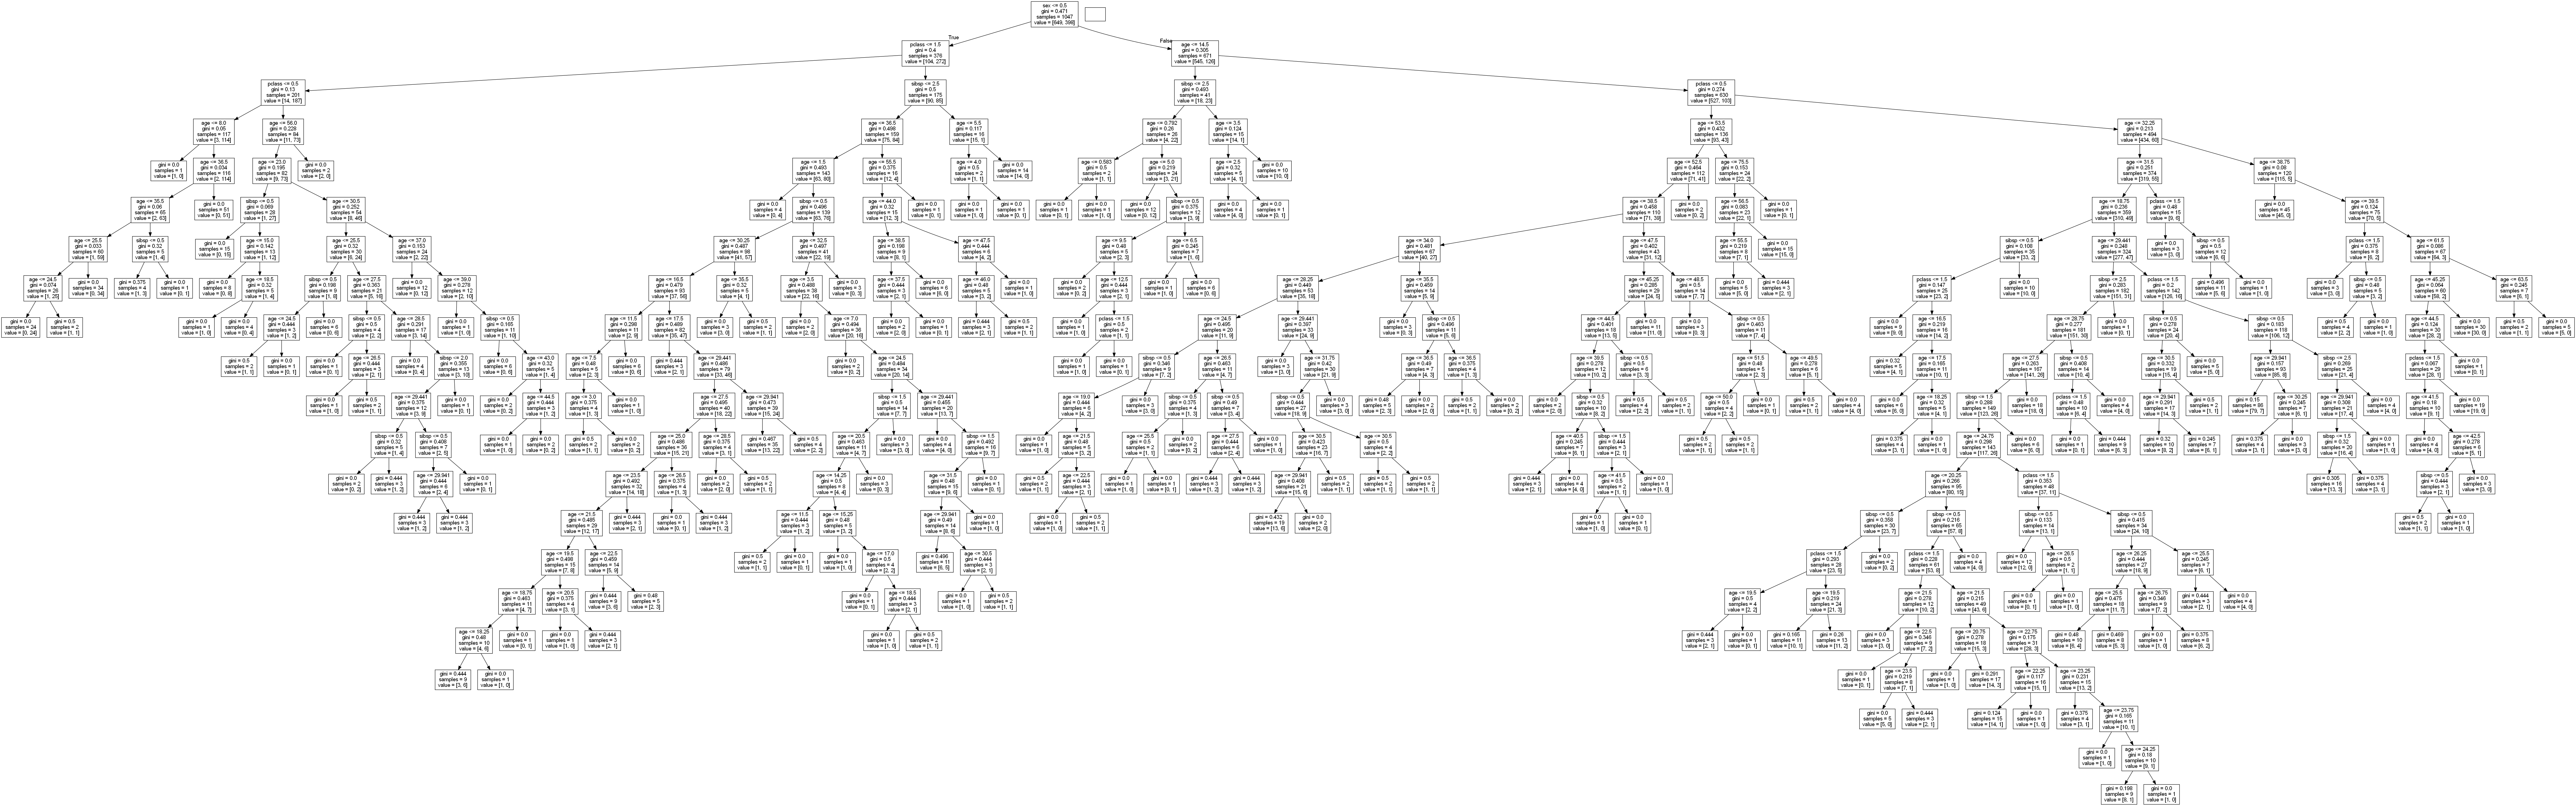

In [9]:
#visualizing decision tree

data = export_graphviz(dec_tree, out_file=None,feature_names=X2.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())


Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. 
Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

In [10]:
# grid search CV function

import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
tuned_parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11],
}

clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tuned_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

clf.fit(X2, Y2)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
print()
print("Detailed classification report:")
print()
y_true, y_pred = Y2_test, clf.predict(X2_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'criterion': 'gini', 'max_leaf_nodes': 10}

Grid scores on development set:

0.780 (+/-0.100) for {'criterion': 'gini', 'max_leaf_nodes': 2}
0.778 (+/-0.080) for {'criterion': 'gini', 'max_leaf_nodes': 3}
0.780 (+/-0.066) for {'criterion': 'gini', 'max_leaf_nodes': 4}
0.789 (+/-0.073) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.791 (+/-0.067) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.805 (+/-0.087) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.804 (+/-0.089) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.806 (+/-0.099) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.807 (+/-0.100) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.805 (+/-0.100) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.780 (+/-0.100) for {'criterion': 'entropy', 'max_leaf_nodes': 2}
0.778 (+/-0.080) for {'criterion': 'entropy', 'max_leaf_nodes': 3}
0.780 (+/-0.066) for {'criterion': 'entropy', 'max_leaf_nodes': 4}
0.782 (+/-0.069) for {'criterion

Step 4: For the pruned tree, report its accuracy on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       160
           1       0.76      0.70      0.72       102

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



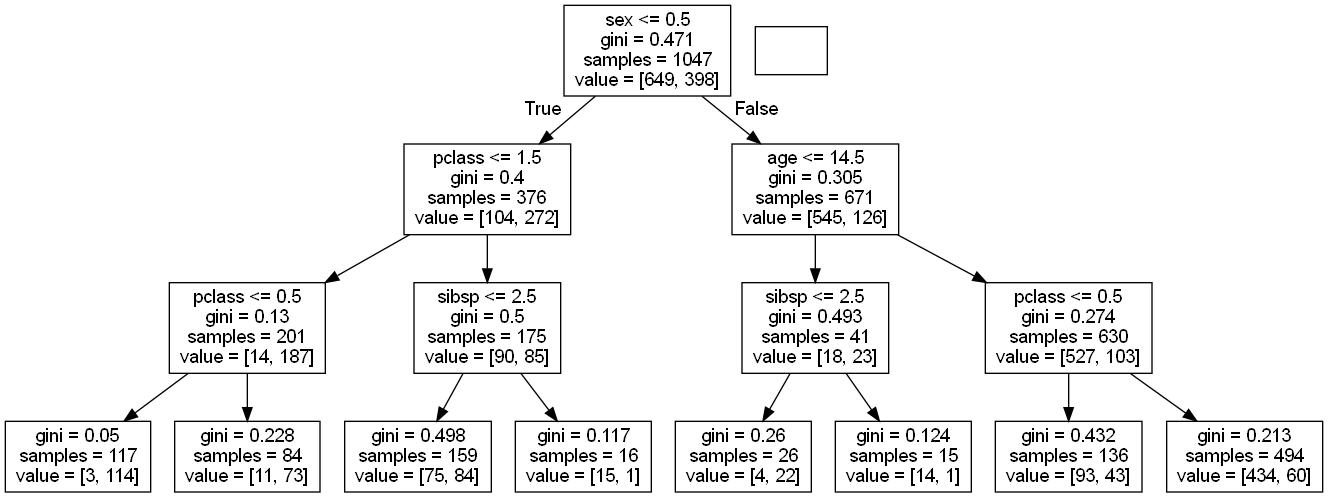

In [11]:
# pruned tree visualization

clf = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10)
clf = clf.fit(X2, Y2)

y_pred = clf.predict(X2_test)

y_true, y_pred = Y2_test, clf.predict(X2_test)
print(classification_report(y_true, y_pred))

data = export_graphviz(clf, out_file=None,feature_names=X2.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

step 4 part b: percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [12]:
y_pred_new = clf.predict(X2_test)
conf_matrix = confusion_matrix(Y2_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

percent survivors correctly predicted (on testing set) : 69.61%

percent fatalities correctly predicted (on testing set) : 85.62%



step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. 
You can set n_estimators as 50. 
Report the accuracy of random forest on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50,max_leaf_nodes=10,n_jobs=-1)
clf.fit(X2, Y2)
y_pred=clf.predict(X2_test)
conf_matrix = confusion_matrix(Y2_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)
print("percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

percent survivors correctly predicted (on testing set) : 60.78%

percent fatalities correctly predicted (on testing set) : 90.00%



final comparison: There is an increase in the percentage of survivors correctly anticipated and a decrease in the percentage of fatalities accurately predicted when compared to the accuracy of the pruned tree in step 4.

In [14]:
%store sensitivity_test

Stored 'sensitivity_test' (float64)


In [15]:
%store specificity_test

Stored 'specificity_test' (float64)
